In [1]:
# Import common python libraries
import numpy as np
import pandas as pd
import os

# Matplotlib for plotting figures
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
EXERCISE_ROOT_DIR = "."
IMAGES_PATH = os.path.join(EXERCISE_ROOT_DIR, "images")

In [2]:
# The function allows images to be saved
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/iris_process.data',
                      delimiter=',',
                      header=None, 
                      names=['sepal length', 'sepal width', 'petal length', 'petal width','class'])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['class'].unique())
print('\n\n',dataset.head())


Number of records: 150

class domain: [0 1]


    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [4]:
X = pd.DataFrame(dataset,columns=['sepal length','sepal width']).values
y = dataset['class'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (150, 2)
The shape of y: (150,)


In [5]:
def plot_dataset(X,y):
    plt.scatter(X[y == 0, 0],X[y == 0, 1],
                s=50, c='lightgreen',
                marker='o', edgecolor='black',label='class 1')
    plt.scatter(X[y == 1, 0],X[y == 1, 1],
                s=50, c='orange',
                marker='v', edgecolor='black',
                label='class 2')
    #plt.legend(scatterpoints=1)
    plt.tight_layout()
    plt.xlabel("sepal length", fontsize=14)
    plt.ylabel("sepal width", fontsize=14)

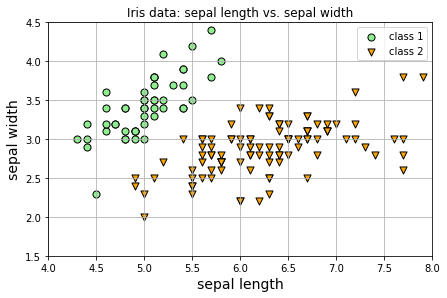

In [6]:
plt.figure(1)
plt.title('Iris data: sepal length vs. sepal width')
plot_dataset(X,y)
plt.grid(True)
plt.axis([4.0,8.0,1.5,4.5])
plt.legend()
plt.show()

In [7]:
def compute_class_params(X,y):
    class_params = []
    for c in np.unique(y):
        X_c = X[np.where(y == c)]
        mu = np.mean(X_c, axis= 0)
        Z = X_c - mu.T
        S = np.dot(Z.T,Z)
        params = {"mean":mu, "S":S}
        class_params.append(params)
    return class_params

In [8]:
class_params = compute_class_params(X, y)
print('\nclass 1 parameters:',class_params[0])
print('class 2 parameters:',class_params[1])


class 1 parameters: {'mean': array([5.006, 3.418]), 'S': array([[6.0882, 4.9146],
       [4.9146, 7.1138]])}
class 2 parameters: {'mean': array([6.262, 2.872]), 'S': array([[43.4956, 12.0936],
       [12.0936, 10.9616]])}


In [9]:
def between_class_matrix(class_params):
    mu1 = class_params[0]["mean"].reshape(-1,1)
    mu2 = class_params[1]["mean"].reshape(-1,1)
    return np.dot((mu1-mu2),(mu1-mu2).T)

In [10]:
B = between_class_matrix(class_params)
print("\nThe between class matrix:\n",B)


The between class matrix:
 [[ 1.577536 -0.685776]
 [-0.685776  0.298116]]


In [11]:
def within_scatter_matrix(class_params):
    S1 = class_params[0]["S"]
    S2 = class_params[1]["S"]
    print("S1:\n",S1)
    print("S2:\n",S2)
    return S1+S2

In [12]:
S = within_scatter_matrix(class_params)
print("\nThe 'Within class scatter matrix':\n",S)

S1:
 [[6.0882 4.9146]
 [4.9146 7.1138]]
S2:
 [[43.4956 12.0936]
 [12.0936 10.9616]]

The 'Within class scatter matrix':
 [[49.5838 17.0082]
 [17.0082 18.0754]]


In [13]:
SINV = np.linalg.pinv(S)
print("S INVERSE:\n",SINV)
M = np.dot(SINV,B)
print("\nTHE MATRIX:\n",M)
eigen = np.linalg.eig(M)
W = eigen[1][:,0].reshape(-1,1) #eigenvector corresponding to th largest eigenvalue 
print("\nEigenvalues:",eigen[0])
print("\nEigenvectors:\n",eigen[1])
print("\nThe largest eigenvalue(found by LDA) is: %.6s" %(eigen[0][0]), \
      "\nThe corresponding eigenvector(w) is:\n%s"%(str(W)))

S INVERSE:
 [[ 0.02977982 -0.02802157]
 [-0.02802157  0.08169094]]

THE MATRIX:
 [[ 0.06619525 -0.02877596]
 [-0.10022672  0.0435699 ]]

Eigenvalues: [ 1.09765148e-01 -6.93889390e-18]

Eigenvectors:
 [[ 0.55110672  0.39867271]
 [-0.83443477  0.91709327]]

The largest eigenvalue(found by LDA) is: 0.1097 
The corresponding eigenvector(w) is:
[[ 0.55110672]
 [-0.83443477]]


In [14]:
def plot_eigenvector(X,W,ax = None):
    mu = X.mean(axis=0)
    ax = ax or plt.gca()
    start, end = mu-1.7 * W[:,0], mu + 1.85 * W[:,0]
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='black', width=1.0))
    ax.set_xlabel("sepal length")
    ax.set_ylabel("sepal width")
    plt.grid(True)

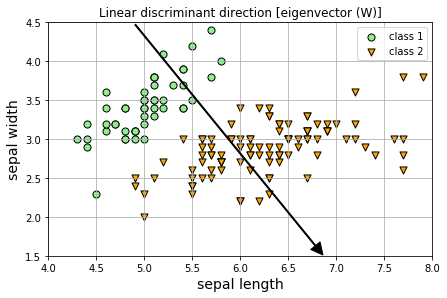

In [15]:
plt.figure(2)
plt.title('Linear discriminant direction [eigenvector (W)]')
plot_dataset(X,y)
plot_eigenvector(X,W)
plt.axis([4.0, 8.0, 1.5, 4.5])
plt.legend()
plt.show()

In [16]:
A = np.dot(np.dot(X,W),W.T) # projection of data 
# Translating matrix A over the data X mean!
Z = (A.mean(axis=0)-X.mean(axis=0)).reshape(-1,1) 
A= A-Z.T

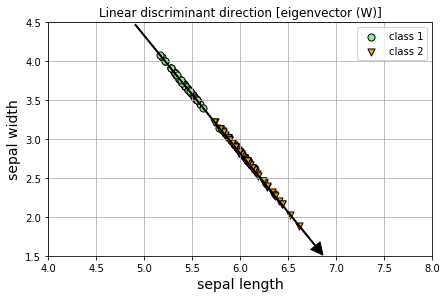

In [17]:
plt.figure(3)
plt.title('Linear discriminant direction [eigenvector (W)]')
plot_dataset(A,y)
plot_eigenvector(X,W)
plt.axis([4.0, 8.0, 1.5, 4.5])
plt.legend()
plt.show()

In [18]:
# Visualizing the projections
def visualize_projections(X, A,W):     
    plt.xlabel("sepal length", fontsize=14)
    plt.ylabel("sepal width", fontsize=14)
    for x in range(X.shape[0]):
        plt.plot([X[x,0],A[x,0]],[X[x,1],A[x,1]],'k--')
    plt.grid(True)

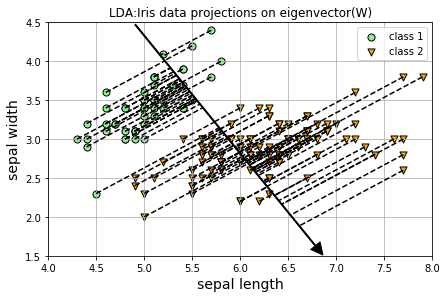

In [19]:
plt.figure(4)
plt.title("LDA:Iris data projections on eigenvector(W)")
plot_dataset(X,y)
plot_eigenvector(X,W)
visualize_projections(X, A,W)
plt.axis([4.0, 8.0, 1.5, 4.5])
plt.legend()
plt.show()